# Sequencing PulseTemplates

In this example we will use the `SequencePulseTemplate` class to build a sequence of two of the simple table pulses defined in [Modelling a Simple TablePulseTemplate](00SimpleTablePulse.ipynb). We will also map the parameters such that we can individually adapt values in either of the two subtemplates.

We start with the defintion of the `TablePulseTemplate`:

In [1]:
from qctoolkit.pulses import TablePT

template = TablePT(entries={0: [(0, 0),
                                ('ta', 'va', 'hold'),
                                ('tb', 'vb', 'linear'),
                                ('tend', 0, 'jump')]},identifier='foo')

Constructing a sequence of two of these requires us to set up a `SequencePulseTemplate` instance which expects a list of subtemplates, a set of external parameters and corresponding parameters mappings:

In [2]:
from qctoolkit.pulses import SequencePT

external_parameters = ['ta', 'tb', 'tc', 'td', 'va', 'vb', 'tend']
first_mapping = {
    'ta': 'ta',
    'tb': 'tb',
    'va': 'va',
    'vb': 'vb',
    'tend': 'tend'
}
second_mapping = {
    'ta': 'tc',
    'tb': 'td',
    'va': 'vb',
    'vb': 'va + vb',
    'tend': '2 * tend'
}
sequence = SequencePT((template, first_mapping),
                      (template, second_mapping),
                      external_parameters=external_parameters)

Our sequence now exposes the parameters declared in the `external_parameters` set:

In [3]:
print(sequence.parameter_names)

{'tend', 'vb', 'ta', 'va', 'tc', 'tb', 'td'}


The mappings are constructed such that the first occurance of our table template will receive its parameters without any modification. For the second, however, we renamed the parameters: The 'tc' parameter of the sequence is mapped to the 'ta' parameter of the table template instance; 'td' is mapped to 'tb' of the subtemplate, 'vb' (of the sequence template) to 'va' (of the subtemplate). The value for 'vb' of the subtemplate is computed as the sum of the values of 'va' and 'vb' passed to the sequence and the value for 'tend' is double before passing it on. We can do a variety of transformations here, allowing us to modify how parameters are handled to add additional computations in composed pulse templates or simply to avoid name collisions between subtemplate parameters.

Let's throw in some values and plot our sequence:

<IPython.core.display.Javascript object>


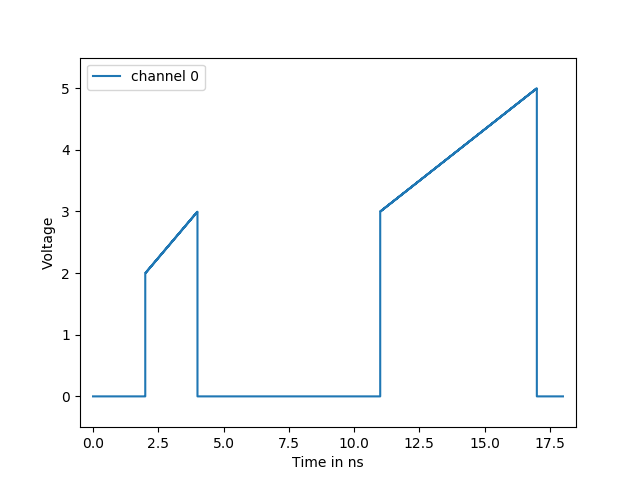

In [4]:
%matplotlib notebook
from qctoolkit.pulses.plotting import plot

parameters = {'ta': 2,
              'va': 2,
              'tb': 4,
              'vb': 3,
              'tc': 5,
              'td': 11,
              'tend': 6}
_ = plot(sequence, parameters, sample_rate=100)